Double Play Analytics

(1) Forecast the outcome of games; (2) understand the most important factors that influence the outcome of games.

- WAR stat
- Sabermetrics/Billy Beane/defense
- Athletics - move to Vegas?
- How to build a park? How to build a team for your park , e.g. left handed pull hitters for Yankee stadium - have a short right field porch/fence; CO the ball travels further so they have a huge outfield - so need fast players to cover the ground.
- Which parks see the most home runs - holding xyz factors constant
- Most important factors of a win? 
    - Pitching (start), pitching (reliever/closer), defense, runs/hitting (consistent), homeruns, the park, OBP, other?
    - run consistency - can you get at least 3 runs per game x percent of the time?
- Mental fortitude as a factor/clutch performance

In [ ]:
# Bringing in packages for EDA, pre-processing, modeling, and visualizations
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
#import os

#from collections import Counter
#import re


#### Create a single dataset

In [ ]:
file_paths = ["data/gl2010.txt", "data/gl2011.txt", "data/gl2012.txt", "data/gl2013.txt", "data/gl2014.txt",
              "data/gl2015.txt", "data/gl2016.txt", "data/gl2017.txt", "data/gl2018.txt", "data/gl2019.txt",
              "data/gl2020.txt", "data/gl2021.txt", "data/gl2022.txt", "data/gl2023.txt"]

In [ ]:
dfs=[]

In [ ]:
for file_path in file_paths:
    with open(file_path, "r") as f:
        # Read lines from the file
        data = f.readlines()
        # Split each line by comma and create a list of lists
        data_split = [line.strip().split(",") for line in data]
        # Create DataFrame from the data
        df_initial = pd.DataFrame(data_split)
        # Append DataFrame to the list
        dfs.append(df_initial)

In [ ]:
# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

#### Understand what the data look like

In [ ]:
# Set the display width to accommodate more characters per row
pd.set_option('display.width', 1000)  # Adjust as needed

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the head of the DataFrame
df.info()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
nan_values = df.isna().any()
nan_values

In [ ]:
df.dtypes

In [ ]:
df.count()

#### Preparing data for more EDA (easier to use with names)

In [ ]:
# Dropping the columns with minimal information at the END of the dataset
# Additional dropping needed--> 
df.drop(columns=df.columns[161:179], inplace=True)

In [ ]:
# Renaming the columns to something more descriptive
new_column_names = {
    0: 'date',
    1: 'num_games',
    2: 'day_of_week',
    3: 'team_visiting',
    4: 'league_visiting',
    5: 'game_num_visiting',
    6: 'team_home',
    7: 'league_home',
    8: 'game_num_home',
    9: 'score_visiting',
    10: 'score_home',
    11: 'outs_in_game',
    12: 'time_of_day',
    13: 'game_completed',
    14: 'forfeit',
    15: 'protest',
    16: 'park_id',
    17: 'attendance',
    18: 'length_min',
    19: 'line_score_visiting',
    20: 'line_score_home',    
    21: 'at_bats_visiting',
    22: 'hits_visiting',
    23: 'double_visiting',
    24: 'triple_visiting',
    25: 'home_run_visiting',
    26: 'rbi_visiting',
    27: 'sacrifice_hit_visiting',
    28: 'sacrifine_fly_visiting',
    29: 'hit_by_pitch_visiting',
    30: 'walk_visiting',
    31: 'intent_walk_visiting',
    32: 'strikeout_visiting',
    33: 'stolen_base_visiting',
    34: 'caught_stealing_visiting',
    35: 'grounded_into_double_plays_visiting',
    36: 'first_catcher_interfere_visiting',
    37: 'left_on_base_visiting',
    38: 'pitchers_used_visiting',
    39: 'individual_earned_runs_visiting',
    40: 'team_earned_runs_visiting',
    41: 'wild_pitches_visiting',
    42: 'balks_visiting',
    43: 'putouts_visiting',   
    44: 'assists_visiting',
    45: 'errors_visiting',
    46: 'passed_balls_visiting',
    47: 'double_def_visiting',
    48: 'triple_def_visiting',       
    49: 'at_bats_home',
    50: 'hits_home',
    51: 'double_home',
    52: 'triple_home',
    53: 'home_run_home',
    54: 'rbi_home',
    55: 'sacrifice_hit_home',
    56: 'sacrifine_fly_home',
    57: 'hit_by_pitch_home',
    58: 'walk_home',
    59: 'intent_walk_home',
    60: 'strikeout_home',
    61: 'stolen_base_home',
    62: 'caught_stealing_home',
    63: 'grounded_into_double_plays_home',
    64: 'first_catcher_interfere_home',
    65: 'left_on_base_home',
    66: 'pitchers_used_home',
    67: 'individual_earned_runs_home',
    68: 'team_earned_runs_home',
    69: 'wild_pitches_home',
    70: 'balks_home',
    71: 'putouts_home',
    72: 'assists_home',
    73: 'errors_home',
    74: 'passed_balls_home',
    75: 'double_def_home',
    76: 'triple_def_home',    
    77: 'home_ump_id',
    78: 'home_ump_name',
    79: '1B_ump_id',
    80: '1B_ump_name',
    81: '2B_ump_id',
    82: '2B_ump_name',
    83: '3B_ump_id',
    84: '3B_ump_name',
    85: 'LF_ump_id',
    86: 'LF_ump_name',
    87: 'RF_ump_id',
    88: 'RF_ump_name',
    89: 'manager_id_visiting',
    90: 'manager_name_visiting',
    91: 'manager_id_home',
    92: 'manager_name_home',
    93: 'winning_pitcher_id',
    94: 'winning_pitcher_name',
    95: 'losing_pitcher_id',
    96: 'losing_pitcher_name',
    97: 'saving_pitcher_id',
    98: 'saving_pitcher_name',
    99: 'game_winning_rbi_id',
    100: 'game_winning_rbi_name',
    101: 'starting_pitcher_id_visiting',
    102: 'starting_pitcher_name_visiting',
    103: 'starting_pitcher_id_home',
    104: 'starting_pitcher_name_home',
    105: 'player1_id_visiting',
    106: 'player1_name_visiting',
    107: 'player1_position_visiting',
    108: 'player2_id_visiting',
    109: 'player2_name_visiting',
    110: 'player2_position_visiting',
    111: 'player3_id_visiting',
    112: 'player3_name_visiting',
    113: 'player3_position_visiting',
    114: 'player4_id_visiting',
    115: 'player4_name_visiting',
    116: 'player4_position_visiting',
    117: 'player5_id_visiting',
    118: 'player5_name_visiting',
    119: 'player5_position_visiting',
    120: 'player6_id_visiting',
    121: 'player6_name_visiting',
    122: 'player6_position_visiting',
    123: 'player7_id_visiting',
    124: 'player7_name_visiting',
    125: 'player7_position_visiting',
    126: 'player8_id_visiting',
    127: 'player8_name_visiting',
    128: 'player8_position_visiting',
    129: 'player9_id_visiting',
    130: 'player9_name_visiting',
    131: 'player9_position_visiting',    
    132: 'player1_id_home',
    133: 'player1_name_home',
    134: 'player1_position_home',
    135: 'player2_id_home',
    136: 'player2_name_home',
    137: 'player2_position_home',
    138: 'player3_id_home',
    139: 'player3_name_home',
    140: 'player3_position_home',
    141: 'player4_id_home',
    142: 'player4_name_home',
    143: 'player4_position_home',
    144: 'player5_id_home',
    145: 'player5_name_home',
    146: 'player5_position_home',
    147: 'player6_id_home',
    148: 'player6_name_home',
    149: 'player6_position_home',
    150: 'player7_id_home',
    151: 'player7_name_home',
    152: 'player7_position_home',
    153: 'player8_id_home',
    154: 'player8_name_home',
    155: 'player8_position_home',
    156: 'player9_id_home',
    157: 'player9_name_home',
    158: 'player9_position_home',
    159: 'misc',
    160: 'acquisition'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

In [ ]:
df['num_games'] = df['num_games'].str.strip('""')

In [ ]:
df['num_games'] = df['num_games'].astype(int)

In [ ]:
################ Do I need to remove num_games here since it's also in the call above?
# Converting most numeric columns from strings to integers
columns_to_convert = [
    "num_games", 
    "game_num_visiting", 
    "game_num_home", 
    "score_visiting", 
    'game_num_home', 
    'score_visiting',    
    'score_home', 
    "outs_in_game", 
    "attendance", 
    "length_min", 
    "at_bats_visiting",                      
    "hits_visiting", 
    "double_visiting", 
    "triple_visiting", 
    "home_run_visiting", 
    "rbi_visiting", 
    "sacrifice_hit_visiting",  
    'sacrifine_fly_visiting',
    'hit_by_pitch_visiting',
    'walk_visiting',
    'intent_walk_visiting',
    'strikeout_visiting',
    'stolen_base_visiting',
    'caught_stealing_visiting',
    'grounded_into_double_plays_visiting',
    'first_catcher_interfere_visiting',
    'left_on_base_visiting',
    'pitchers_used_visiting',
    'individual_earned_runs_visiting',
    'team_earned_runs_visiting',
    'wild_pitches_visiting',
    'balks_visiting',
    'putouts_visiting',   
    'assists_visiting',
    'errors_visiting',
    'passed_balls_visiting',
    'double_def_visiting',
    'triple_def_visiting',       
    'at_bats_home',
    'hits_home',
    'double_home',
    'triple_home',
    'home_run_home',
    'rbi_home',
    'sacrifice_hit_home',
    'sacrifine_fly_home',
    'hit_by_pitch_home',
    'walk_home',
    'intent_walk_home',
    'strikeout_home',
    'stolen_base_home',
    'caught_stealing_home',
    'grounded_into_double_plays_home',
    'first_catcher_interfere_home',
    'left_on_base_home',
    'pitchers_used_home',
    'individual_earned_runs_home',
    'team_earned_runs_home',
    'wild_pitches_home',
    'balks_home',
    'putouts_home',
    'assists_home',
    'errors_home',
    'passed_balls_home',
    'double_def_home',
    'triple_def_home']

# Player positions are numeric, but are being left as strings

In [ ]:
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Trying to convert these columns to strings--
columns_to_convert_strings = [
  'date',
  'num_games',
  'day_of_week',
  'team_visiting',
  'league_visiting',
  'team_home',
  'league_home',   
  'time_of_day',
  'park_id',    
  'line_score_visiting',
  'line_score_home', 
  'home_ump_id',
  'home_ump_name',
  '1B_ump_id',
  '1B_ump_name',
  '2B_ump_id',
  '2B_ump_name',
  '3B_ump_id',
  '3B_ump_name',
  'LF_ump_id',
  'LF_ump_name',
  'RF_ump_id',
  'RF_ump_name',
  'manager_id_visiting',
  'manager_name_visiting',
  'manager_id_home',
  'manager_name_home',
  'winning_pitcher_id',
  'winning_pitcher_name',
  'losing_pitcher_id',
  'losing_pitcher_name',
  'saving_pitcher_id',
  'saving_pitcher_name',
  'game_winning_rbi_id',
  'game_winning_rbi_name',
  'starting_pitcher_id_visiting',
  'starting_pitcher_name_visiting',
  'starting_pitcher_id_home',
  'starting_pitcher_name_home',
  'player1_id_visiting',
  'player1_name_visiting',
  'player2_id_visiting',
  'player2_name_visiting',
  'player3_id_visiting',
  'player3_name_visiting',
  'player4_id_visiting',
  'player4_name_visiting',
  'player5_id_visiting',
  'player5_name_visiting',
  'player6_id_visiting',
  'player6_name_visiting',
  'player7_id_visiting',
  'player7_name_visiting',
  'player8_id_visiting',
  'player8_name_visiting',
  'player9_id_visiting',
  'player9_name_visiting',
  'player1_id_home',
  'player1_name_home',
  'player2_id_home',
  'player2_name_home',
  'player3_id_home',
  'player3_name_home',
  'player4_id_home',
  'player4_name_home',
  'player5_id_home',
  'player5_name_home',
  'player6_id_home',
  'player6_name_home',
  'player7_id_home',
  'player7_name_home',
  'player8_id_home',
  'player8_name_home',
  'player9_id_home',
  'player9_name_home',
  'acquisition']

In [ ]:
df[columns_to_convert_strings] = df[columns_to_convert_strings].applymap(lambda x: x.strip('""') if isinstance(x, str) else x)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.count()

In [ ]:
df.dtypes

##### Columns with missing data- 
I think it's likely I won't be using attendance or length_min- will likely drop full columns
For the other three I will likely drop the rows, not a noteable number of missings, no reason to believe there is anything systematic about these missings, but I'll look to confirm, e.g., same season, same team, etc.

Initial total rows = 32484 

Dropped column
- attendance                             31549
- length_min                             32446
- protest
- misc

Dropped rows
- year = 2020; removed this, but not so sure. If I'm not analyzing by year it feels weird to remove it.
- at_bats_visiting                       32479
- double_visiting                        32446
- triple_visiting                        32446


##### Fields with large 'missing' /NA - how to handle these missing? 
 - saving_pitcher_id
 - saving_pitcher_name
 - game_winning_rbi_id
 - game_winning_rbi_name
 


In [ ]:
# Dropping rows with missing values in the listed columns
df.dropna(subset=["at_bats_visiting", "double_visiting", "triple_visiting"], inplace=True)

In [ ]:
# This drops the partial 2020 season; not sure I want to drop it. It was an odd year, 
# but unless I'm looking at year as a factor what is the impact of keeping it in?
# df = df[df['year'] != 2020]

In [ ]:
df.drop(columns=["attendance", "length_min", "game_completed", "forfeit", "LF_ump_id", "LF_ump_name", "RF_ump_id", "RF_ump_name", "protest", "misc"], inplace=True)
#both game_completed and forfeit had zero values/100% null for this timeframe
#LF_ump_id, LF_ump_name, RF_ump_id, RF_ump_name have three values each; these umps rarely used in regular season games

In [ ]:
df['team_visiting'].replace({"FLO": "MIA"}, inplace=True)
df['team_home'].replace({"FLO": "MIA"}, inplace=True)

In [ ]:
df.head()

#### Create new features

In [ ]:
# Creating an integer four-digit year feature

# Extract the first four characters
year_digits = df['date'].str[0:4]

# Convert the extracted substring to numeric
df['year'] = pd.to_numeric(year_digits)

# Print the result
print(df["year"])


In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
# Creating a feature for the winning team for each game/row
def compare_and_get_value(row):
    if row['score_visiting'] > row['score_home']:
        return row['team_visiting']
    elif row ['score_home'] > row['score_visiting']:
        return row['team_home']
    else:
        return 'tie_game'

# Create a new feature based on the comparison
df['winning_team'] = df.apply(compare_and_get_value, axis=1)

# There is one game that ended in a tie, CNC and PIT Sept 29, 2016 

In [ ]:
df['winning_team'].value_counts()

In [ ]:
def calculate_run_differential(row):
    if row['winning_team'] == row['team_home']:
        return row['score_home'] - row['score_visiting']
    else:
        return row['score_visiting'] - row['score_home']

# Apply the function to create a new column 'goal_difference'
df['run_differential'] = df.apply(calculate_run_differential, axis=1)

In [ ]:
df['run_differential'].value_counts()

In [ ]:
# Filter the DataFrame to include only rows where 'run differential' is 0, i.e., a tie game
observation = df[df['run_differential'] == 0]

# Print the entire row(s) corresponding to the observation(s) with a goal difference of 0
observation

# There is one game that ended in a tie, CNC and PIT Sept 29, 2016 

In [ ]:
# Total Runs per Game
df['total_runs'] = df['score_home'] + df['score_visiting']


In [ ]:
# Combine 'team_home' and 'team_visiting' columns into a single column
df['teams'] = df['team_home'].append(df['team_visiting'], ignore_index=True)

df['teams'].value_counts()

In [ ]:
# Combine 'team_home' and 'team_visiting' columns into a single column
df['strikeouts'] = df['strikeout_home'].append(df['strikeout_visiting'], ignore_index=True)

df['strikeouts'].value_counts()

#### Crosstabs and Value Counts

In [ ]:
#cross_tab = pd.crosstab(df['team_home'], df['outs_in_game'])
#print(cross_tab)

In [ ]:
grouped_df = df.groupby('teams')['total_runs'].sum()
grouped_df.head()

In [ ]:
grouped_df = df.groupby(['teams', 'year'])['total_runs'].sum()
grouped_df.head(20)

In [ ]:
cross_tab2 = pd.crosstab(df['strikeouts'], df['year'])
print(cross_tab2)

In [ ]:
sns.barplot(x='year', y='strikeouts', data=df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
sns.barplot(x='teams', y='strikeouts', data=df, estimator=sum)

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Team')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
# Runs by Year
sns.barplot(x='year', y='total_runs', data=df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Runs')
plt.title('Runs by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
df['total_runs'].describe()

In [ ]:
df['total_runs'] = pd.to_numeric(df['total_runs'])
df_sorted = df.sort_values(by='total_runs', ascending=False)

In [ ]:
# Sort the DataFrame by total_runs in descending order

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='total_runs', y='teams', data=df_sorted, palette='viridis')
plt.xlabel('Runs')
plt.ylabel('Team')
plt.title('Number of Runs by Team')
plt.show()

In [ ]:
# Train_Test_Split
# Preprocessing (standard scale, OHE, simple imputer(?), other)

#X= df[]
#y= df['winning_team']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

#scaler = StandardScaler(
#scaler.fit(X_train)
#X_train_ss = scaler.transform(X_train)
#X_test_ss = scaler.transform(X_test)

In [ ]:

#model_log1 = LogisticRegression(random_state=13)
#model_log1.fit(X_train_ss, y_train)

#### Notes - Working

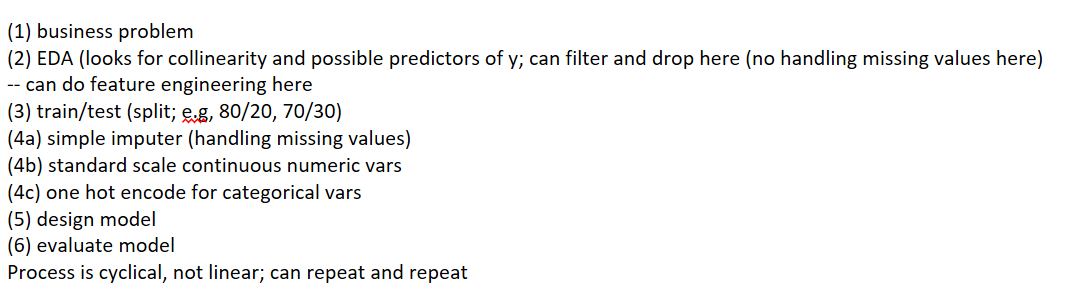